In [1]:
import pandas as pd
import json
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from typing import List


def get_readed_prediction_errors_files(dir: str) -> List[str]:
    errors = []
    for root, dirs, files in os.walk(dir):
        for file in files:
            if file.endswith("prediction_errors.json"):
                errors.append(os.path.join(root, file))
    return errors

def get_readed_prediction_errors_files_for_moving_average(
    dir: str, seconds: str
) -> List[str]:
    errors = []
    for root, dirs, files in os.walk(dir):
        for file in files:
            if file.endswith(f"{seconds}_prediction_errors.json"):
                errors.append(os.path.join(root, file))
    return errors

def get_readed_prediction_errors(file_path: str) -> List[float]:
    with open(file_path, 'r') as file:
        errors = json.load(file)

    return errors

In [3]:
moving_average_error_files = get_readed_prediction_errors_files_for_moving_average('data_moving_average_windows_results', 30)

moving_average_errors = list()
for f in moving_average_error_files:
    errors = get_readed_prediction_errors(f)
    moving_average_errors.extend(errors)
moving_average_errors = [e for e in moving_average_errors]
moving_average_errors_df = pd.DataFrame(
    {'method': 'moving average','error': moving_average_errors}
)

hawkes_error_files = get_readed_prediction_errors_files('data_20min_training')

hawkes_errors = list()
for f in hawkes_error_files:
    errors = get_readed_prediction_errors(f)
    hawkes_errors.extend(errors)

hawkes_errors_df = pd.DataFrame(
    {'method': 'hawkes','error': hawkes_errors}
)

errors_df = pd.concat([hawkes_errors_df, moving_average_errors_df])
errors_df['error'] = errors_df['error'].abs()
errors_df.head()

,method,error
0,hawkes,0.138880
1,hawkes,0.226567
2,hawkes,0.305554
3,hawkes,0.160853
4,hawkes,0.214304


<AxesSubplot:xlabel='method', ylabel='error'>

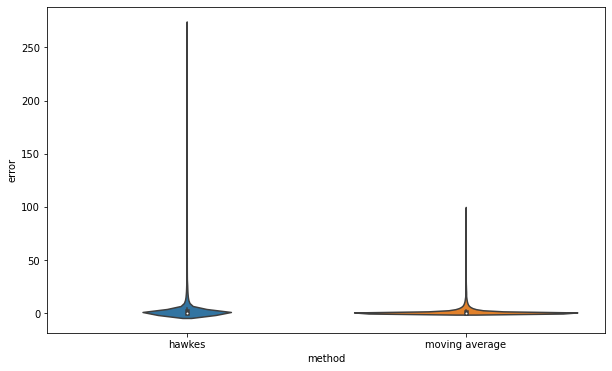

In [4]:
# violplot of errors
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.violinplot(data=errors_df, x='method', y='error')


<AxesSubplot:xlabel='method', ylabel='error'>

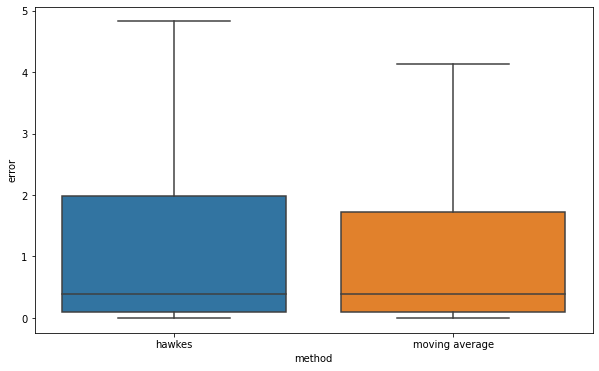

In [16]:
# violplot of errors
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed
sns.boxplot(data=errors_df, x='method', y='error', showfliers=False)